# 0. Import Libraries

In [1]:
import pandas as pd
import numpy as np 
import os
import zipfile
import seaborn as sns
import matplotlib.pyplot as plt
from my_krml_25246568.features.plots import create_countplot, create_pie_chart, histogram_boxplot, labeled_barplot, create_corr_matrix
from my_krml_25246568.features.missing_values import missing_values_summary
from itertools import combinations
import isodate
import pytz

In [140]:
pip uninstall -y my_krml_25246568

Found existing installation: my_krml_25246568 2024.0.1.1
Uninstalling my_krml_25246568-2024.0.1.1:
  Successfully uninstalled my_krml_25246568-2024.0.1.1
Note: you may need to restart the kernel to use updated packages.


In [141]:
pip install -i https://test.pypi.org/simple/ my_krml_25246568==2024.0.1.2

Looking in indexes: https://test.pypi.org/simple/
Note: you may need to restart the kernel to use updated packages.


# 1. Loading Files

The input directory contains multiple folders for all the US origins. These origins have their itineraries saved as zip files in their respective folder.

In [3]:
# Set the path to the root directory containing the zip files
root_dir = '../data/raw/itineraries_csv'

# Initialize an empty list to hold DataFrames
df_list = []

# Walk through the root directory
for folder_name, subfolders, filenames in os.walk(root_dir):
    for filename in filenames:
        if filename.endswith('.zip'):
            # Get the full path to the zip file
            zip_file_path = os.path.join(folder_name, filename)
            
            # Open the zip file
            with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
                # Loop through files inside the zip and check if it's a CSV
                for file in zip_ref.namelist():
                    if file.endswith('.csv'):
                        # Read the CSV into a DataFrame
                        with zip_ref.open(file) as f:
                            df = pd.read_csv(f)
                            # Append the DataFrame to the list
                            df_list.append(df)

# Concatenate all DataFrames into one
merged_df = pd.concat(df_list, ignore_index=True)

In [4]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13519999 entries, 0 to 13519998
Data columns (total 23 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   legId                              object 
 1   searchDate                         object 
 2   flightDate                         object 
 3   startingAirport                    object 
 4   destinationAirport                 object 
 5   travelDuration                     object 
 6   isBasicEconomy                     bool   
 7   isRefundable                       bool   
 8   isNonStop                          bool   
 9   totalFare                          float64
 10  totalTravelDistance                float64
 11  segmentsDepartureTimeEpochSeconds  object 
 12  segmentsDepartureTimeRaw           object 
 13  segmentsArrivalTimeEpochSeconds    object 
 14  segmentsArrivalTimeRaw             object 
 15  segmentsArrivalAirportCode         object 
 16  segmentsDepartur

In [5]:
merged_df.describe()

,totalFare,totalTravelDistance
count,1.352000e+07,1.256038e+07
mean,3.737535e+02,1.569619e+03
std,2.075496e+02,8.414888e+02
min,2.397000e+01,9.700000e+01
25%,2.235800e+02,8.620000e+02
50%,3.446000e+02,1.392000e+03
75%,4.876000e+02,2.376000e+03
max,8.260610e+03,4.430000e+03


In [11]:
merged_df.to_csv('../data/raw/merged_file/merged_flight_data.csv', index=False)

# 2. Basic Data Info

In [2]:
merged_df = pd.read_csv('../data/raw/merged_file/merged_flight_data.csv')

In [3]:
merged_df.head()

,legId,searchDate,flightDate,startingAirport,destinationAirport,travelDuration,isBasicEconomy,isRefundable,isNonStop,totalFare,...,segmentsArrivalTimeEpochSeconds,segmentsArrivalTimeRaw,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,segmentsAirlineCode,segmentsEquipmentDescription,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode
0,e1b137527b9175d7d930c3af82e70ae0,2022-04-19,2022-05-20,OAK,ATL,PT7H52M,False,False,False,103.98,...,1653107460||1653126600,2022-05-20T22:31:00.000-06:00||2022-05-21T05:5...,DEN||ATL,OAK||DEN,Frontier Airlines||Frontier Airlines,F9||F9,||Airbus A320,9180||10620,943||1207,coach||coach
1,d813ebd107e3fa700206c0d96015da7a,2022-04-19,2022-05-20,OAK,ATL,PT6H15M,False,False,False,216.58,...,1653067080||1653084660,2022-05-20T10:18:00.000-07:00||2022-05-20T18:1...,LAX||ATL,OAK||LAX,Spirit Airlines||Spirit Airlines,NK||NK,||AIRBUS INDUSTRIE A320 SHARKLETS,4920||15600,None||None,coach||coach
2,e8ece5ad6f5962c696e06e031fc2a24a,2022-04-19,2022-05-20,OAK,ATL,PT9H6M,False,False,False,216.58,...,1653056820||1653084660,2022-05-20T07:27:00.000-07:00||2022-05-20T18:1...,LAX||ATL,OAK||LAX,Spirit Airlines||Spirit Airlines,NK||NK,AIRBUS INDUSTRIE A320 SHARKLETS||AIRBUS INDUST...,4920||15600,None||None,coach||coach
3,c004a54681335100f326c9613b3c9448,2022-04-19,2022-05-20,OAK,ATL,PT6H17M,False,False,False,237.58,...,1653110940||1653127980,2022-05-20T22:29:00.000-07:00||2022-05-21T06:1...,LAS||ATL,OAK||LAS,Spirit Airlines||Spirit Airlines,NK||NK,AIRBUS INDUSTRIE A320 SHARKLETS||Airbus A319,5580||13980,None||None,coach||coach
4,4a42bbf77211b4afa7b9e14005949120,2022-04-19,2022-05-20,OAK,ATL,PT14H12M,False,False,False,307.21,...,1653115560||1653159180,2022-05-20T23:46:00.000-07:00||2022-05-21T14:5...,SEA||ATL,OAK||SEA,Alaska Airlines||Alaska Airlines,AS||AS,Boeing 737-900||Boeing 737-900,7500||17580,672||2178,coach||coach


# 3. Exploratory Data Analysis

## [3.1] Target Variable - Total Fare

The maximum total fare value is somewhere around 8200. Based on the graphs generated the median fare is around 400. The volume of density is largest around the same fare amount as well.

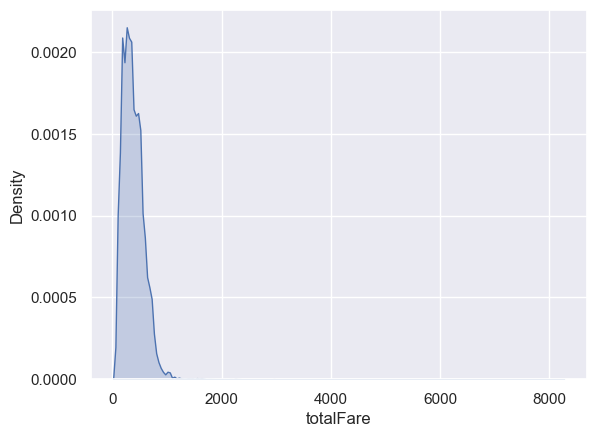

In [4]:
sns.set_theme(style="darkgrid")
sns.kdeplot(merged_df['totalFare'], fill=True, bw_adjust=0.5)
plt.show()

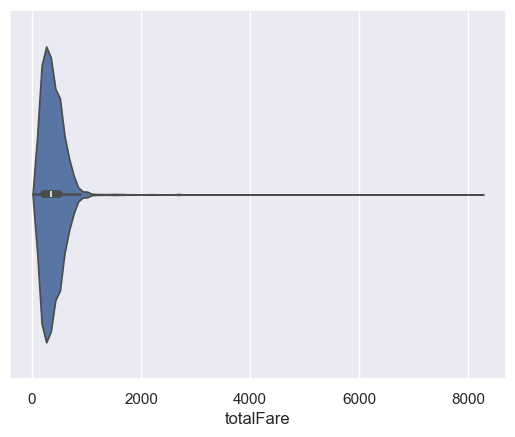

In [5]:
sns.violinplot(x="totalFare", data=merged_df)
plt.show()

## [3.2] Search Date & Flight Date

The dataset contains flight itineraries for the year 2022 and months ranging from April to July. The highest fare amount was recorded during the month of April and the lowest was during May/June.

In [6]:
merged_df['searchDate'].value_counts()

searchDate
2022-05-02    540011
2022-04-17    536269
2022-04-30    532206
2022-05-03    531400
2022-04-29    531353
2022-04-28    530492
2022-04-25    529018
2022-05-01    527933
2022-05-05    526935
2022-04-19    526764
2022-05-06    526760
2022-05-18    526647
2022-05-09    525063
2022-04-23    524379
2022-05-07    522793
2022-05-12    522779
2022-04-21    522447
2022-05-13    521824
2022-05-08    518705
2022-04-22    511658
2022-05-04    504047
2022-04-27    462260
2022-04-18    457449
2022-04-20    331144
2022-04-26    301682
2022-04-24    232588
2022-05-14    174054
2022-05-10    150199
2022-05-19    136042
2022-05-11    112312
2022-04-16     87657
2022-05-17     35129
Name: count, dtype: int64

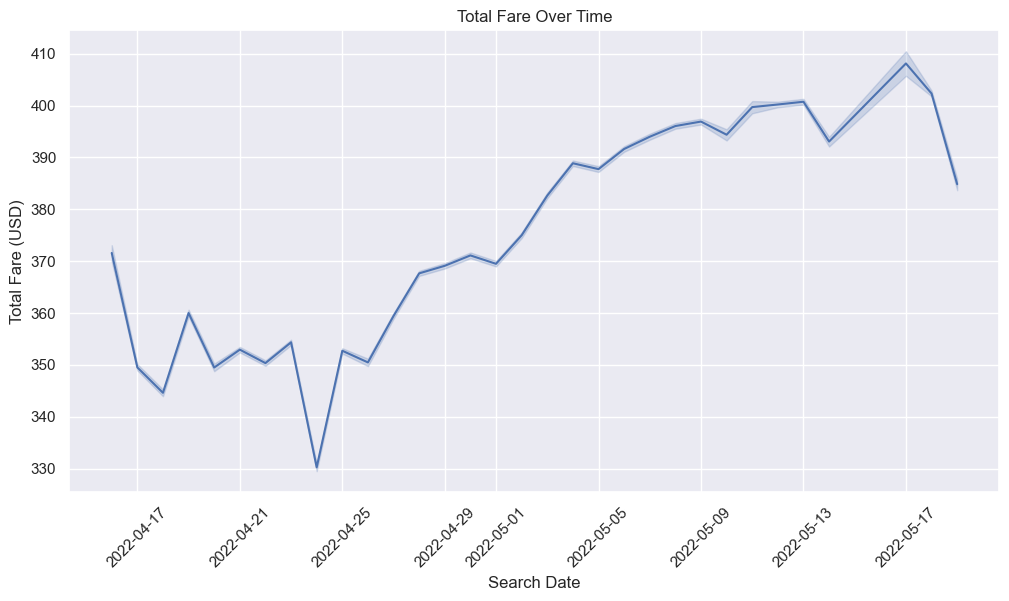

In [7]:
time_df = pd.DataFrame()
time_df['search_date'] = pd.to_datetime(merged_df['searchDate'])
time_df['totalFare'] = merged_df['totalFare']
time_df.set_index('search_date', inplace=True)

plt.figure(figsize=(12, 6))
sns.lineplot(data=time_df, x='search_date', y='totalFare')
plt.title("Total Fare Over Time")
plt.xlabel("Search Date")
plt.ylabel("Total Fare (USD)")
plt.xticks(rotation=45)
plt.show()

In [8]:
merged_df['flightDate'].value_counts()

flightDate
2022-05-24    285643
2022-05-17    275708
2022-05-19    270504
2022-05-18    269886
2022-05-23    267154
               ...  
2022-07-13      9244
2022-07-15      9153
2022-04-17      8258
2022-07-16      7941
2022-07-17      7905
Name: count, Length: 92, dtype: int64

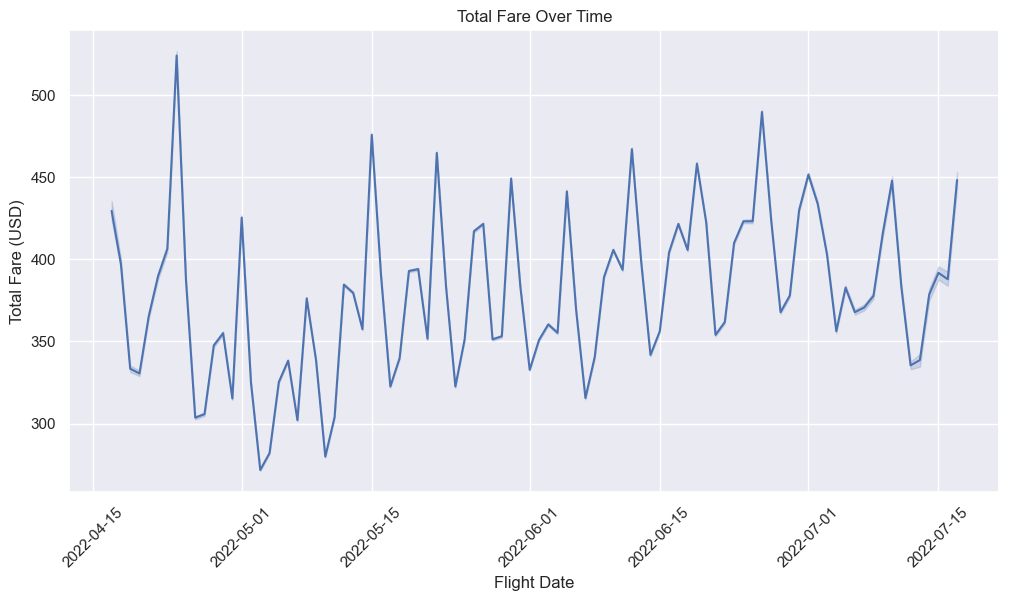

In [9]:
time_df = pd.DataFrame()
time_df['flight_date'] = pd.to_datetime(merged_df['flightDate'])
time_df['totalFare'] = merged_df['totalFare']
time_df.set_index('flight_date', inplace=True)

plt.figure(figsize=(12, 6))
sns.lineplot(data=time_df, x='flight_date', y='totalFare')
plt.title("Total Fare Over Time")
plt.xlabel("Flight Date")
plt.ylabel("Total Fare (USD)")
plt.xticks(rotation=45)
plt.show()

## [3.3] Starting & Destination Airport

There are 16 unique airport locations included as the origin and destination. These values are entered in the form of IATA codes for each location.

In [10]:
merged_df['startingAirport'].value_counts()

startingAirport
LAX    1352275
LGA    1021938
BOS     989175
SFO     949046
DFW     896596
ORD     894646
MIA     875288
ATL     874069
CLT     854536
PHL     785039
DEN     770429
DTW     747751
EWR     699628
JFK     688263
IAD     594215
OAK     527105
Name: count, dtype: int64

In [11]:
merged_df['destinationAirport'].value_counts()

destinationAirport
LAX    1295126
LGA    1032726
DFW     929732
MIA     928766
BOS     923999
ORD     917732
SFO     916991
ATL     904571
CLT     888283
DEN     787482
PHL     763140
DTW     744320
EWR     713693
JFK     692376
IAD     571700
OAK     509362
Name: count, dtype: int64

LAX has the highest number of departures, followed by LGA, indicating that these airports experience significant travel activity during these months.

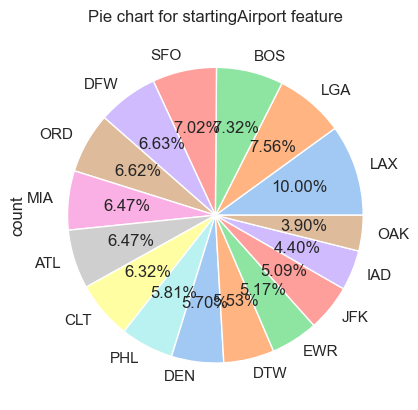

In [12]:
create_pie_chart(merged_df, 'startingAirport')

LAX has the highest number of departures, followed by LGA, indicating that these airports experience significant travel activity during these months. Subsequently, the most expensive origin-destination pair is LGA->OAK, followed by IAD->OAK and the cheapest is BOS->LGA.

/var/folders/y7/4mw_ll2n3zz0kzg7v6kt7kwm0000gn/T/ipykernel_5778/4035227118.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_20_pairs.index, y=top_20_pairs.values, palette="viridis")


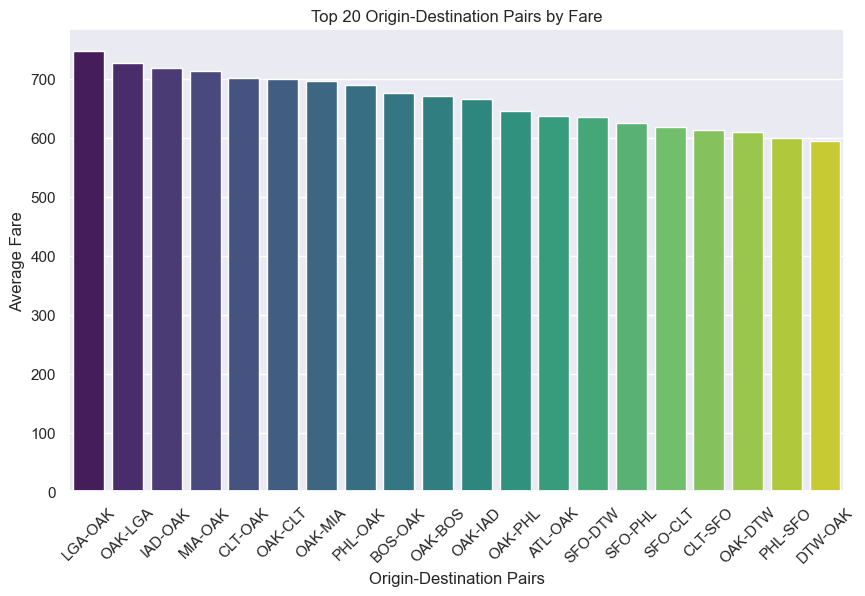

In [13]:
pair_df = pd.DataFrame()
pair_df['totalFare'] = merged_df['totalFare']
pair_df['origin_destination'] = merged_df['startingAirport'] + '-' + merged_df['destinationAirport']

# Calculate mean for each origin-destination pair
pair_fares = pair_df.groupby('origin_destination')['totalFare'].mean().sort_values(ascending=False)
# Get the top 10 pairs
top_20_pairs = pair_fares.head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_20_pairs.index, y=top_20_pairs.values, palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("Origin-Destination Pairs")
plt.ylabel("Average Fare")
plt.title("Top 20 Origin-Destination Pairs by Fare")
plt.show()

/var/folders/y7/4mw_ll2n3zz0kzg7v6kt7kwm0000gn/T/ipykernel_5778/1907375488.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bottom_20_pairs.index, y=bottom_20_pairs.values, palette="viridis")


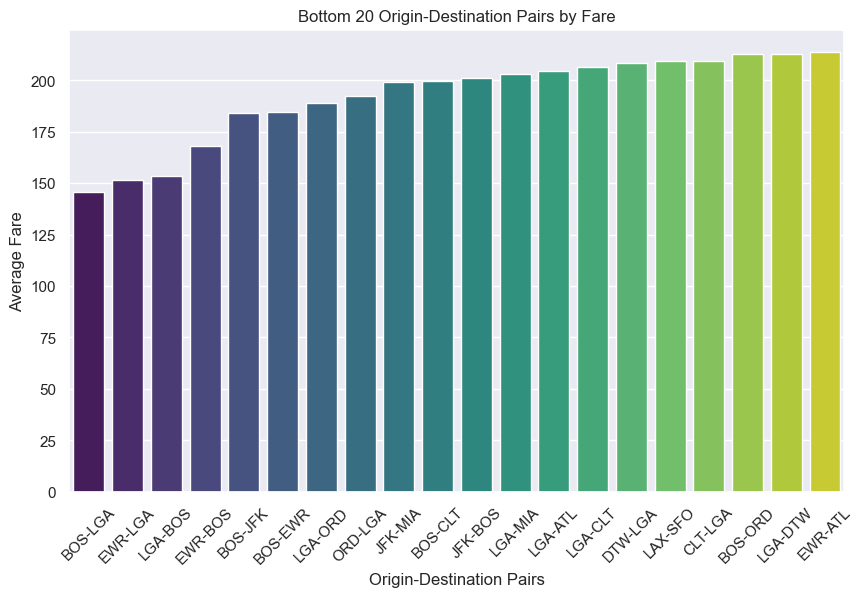

In [14]:
pair_df = pd.DataFrame()
pair_df['totalFare'] = merged_df['totalFare']
pair_df['origin_destination'] = merged_df['startingAirport'] + '-' + merged_df['destinationAirport']

# Calculate mean for each origin-destination pair
pair_fares = pair_df.groupby('origin_destination')['totalFare'].mean().sort_values(ascending=True)
# Get the bottom 10 pairs
bottom_20_pairs = pair_fares.head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x=bottom_20_pairs.index, y=bottom_20_pairs.values, palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("Origin-Destination Pairs")
plt.ylabel("Average Fare")
plt.title("Bottom 20 Origin-Destination Pairs by Fare")
plt.show()

In [15]:
unique_pairs = {}
# Get all possible pairs of columns
for col1, col2 in combinations(merged_df.columns, 2):
    # Create a new DataFrame with only the two columns and drop duplicates
    unique_pairs[('startingAirport', 'destinationAirport')] = merged_df[['startingAirport', 'destinationAirport']].drop_duplicates()
print(unique_pairs)

{('startingAirport', 'destinationAirport'):          startingAirport destinationAirport
0                    OAK                ATL
36                   OAK                BOS
74                   OAK                CLT
92                   OAK                DEN
118                  OAK                DFW
...                  ...                ...
12645135             MIA                JFK
12645162             MIA                LAX
12645224             MIA                LGA
12645269             MIA                OAK
12645287             MIA                ORD

[235 rows x 2 columns]}


## [3.4] Travel Duration

The travel duration and distance show a linear relation with the total fare. Usually if the distance or duration increase the flight prices increase. This is due to the increases in resources required for a flight to cover larger distances.

In [3]:
# Converting travel duration from iso format to mins
def iso_duration_to_minutes(duration):
    parsed_duration = isodate.parse_duration(duration)
    return parsed_duration.total_seconds() / 60

In [17]:
# Apply the function to the travel_duration column
merged_df['travelDurationMins'] = merged_df['travelDuration'].apply(iso_duration_to_minutes)

In [18]:
min_duration = merged_df['travelDurationMins'].min()
max_duration = merged_df['travelDurationMins'].max()

print(f"Minimum travel duration: {min_duration} minutes")
print(f"Maximum travel duration: {max_duration} minutes")

Minimum travel duration: 46.0 minutes
Maximum travel duration: 2566.0 minutes


In [19]:
df_sample = merged_df.sample(frac=0.02, random_state=42)

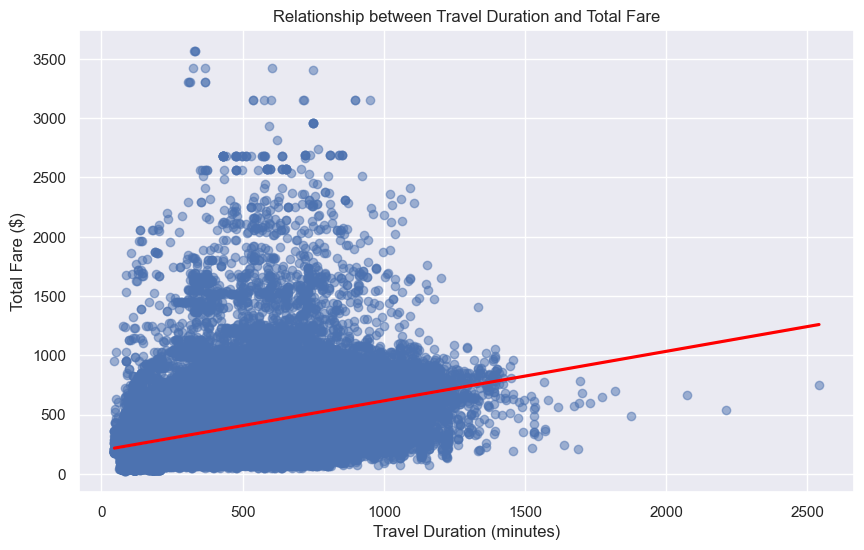

In [20]:
plt.figure(figsize=(10, 6))

# Plot a scatter plot with a regression line
sns.regplot(x='travelDurationMins', y='totalFare', data=df_sample, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.xlabel('Travel Duration (minutes)')
plt.ylabel('Total Fare ($)')
plt.title('Relationship between Travel Duration and Total Fare')
plt.show()

## [3.5] Total Travel Distance

The travel duration and distance show a linear relation with the total fare. Usually if the distance or duration increase the flight prices increase. This is due to the increases in resources required for a flight to cover larger distances.

In [21]:
min_distance = merged_df['totalTravelDistance'].min()
max_distance = merged_df['totalTravelDistance'].max()

print(f"Minimum travel distance: {min_distance} miles")
print(f"Maximum travel distance: {max_distance} miles")

Minimum travel distance: 97.0 miles
Maximum travel distance: 4430.0 miles


In [22]:
df_sample_distance = merged_df.sample(frac=0.05, random_state=42)

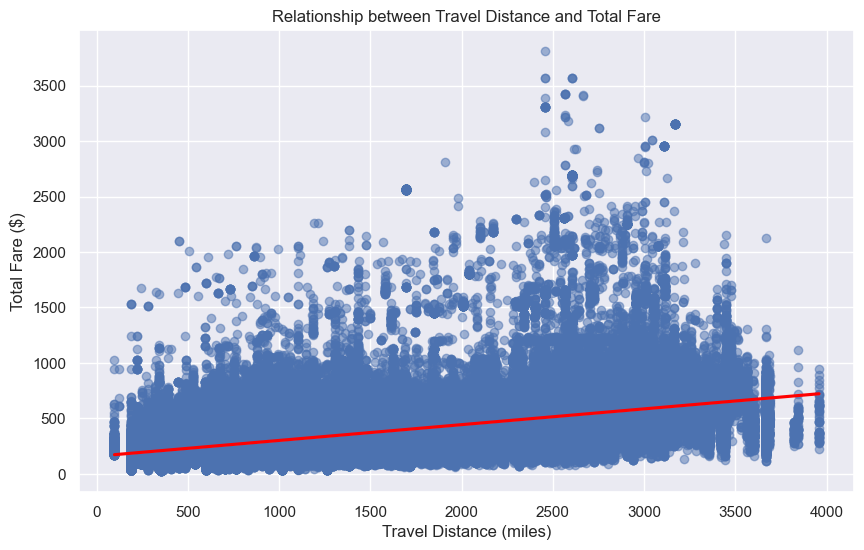

In [23]:
plt.figure(figsize=(10, 6))

# Plot a scatter plot with a regression line
sns.regplot(x='totalTravelDistance', y='totalFare', data=df_sample_distance, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.xlabel('Travel Distance (miles)')
plt.ylabel('Total Fare ($)')
plt.title('Relationship between Travel Distance and Total Fare')
plt.show()

## [3.6] Basic Economy

Majority of the people travel in basic economy, this could be due to the higher fares related to premium seating options.

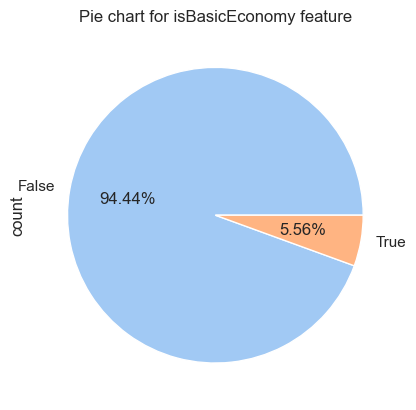

In [24]:
create_pie_chart(merged_df, 'isBasicEconomy')

The average price for non-basic seats is almost double than that of basic. This could be the factore due to which people prefer flying in basic economy.

/var/folders/y7/4mw_ll2n3zz0kzg7v6kt7kwm0000gn/T/ipykernel_5778/4275483038.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_fares, x='isBasicEconomy', y='averageFare', palette='viridis')


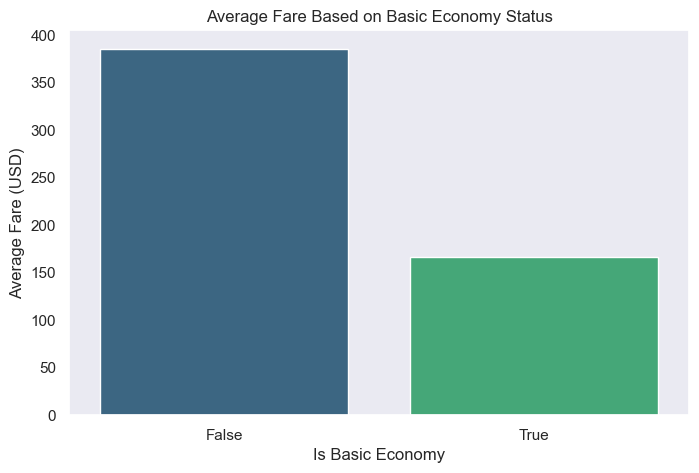

In [25]:
average_fares = merged_df.groupby('isBasicEconomy')['totalFare'].mean().reset_index()

average_fares.columns = ['isBasicEconomy', 'averageFare']

# Create a bar plot
plt.figure(figsize=(8, 5))
sns.barplot(data=average_fares, x='isBasicEconomy', y='averageFare', palette='viridis')

# Add labels and title
plt.title('Average Fare Based on Basic Economy Status')
plt.xlabel('Is Basic Economy')
plt.ylabel('Average Fare (USD)')
plt.xticks(ticks=[0, 1], labels=['False', 'True'])
plt.grid(axis='y')

# Show the plot
plt.show()

In [26]:
# Filter the DataFrame for isBasicEconomy == True
basic_economy_df = merged_df[merged_df['isBasicEconomy'] == True]

# Group by starting and destination airports, then count occurrences
highest_basic_economy_counts = basic_economy_df.groupby(['startingAirport', 'destinationAirport']).size()

# Find the origin-destination pair with the highest count
highest_pair = highest_basic_economy_counts.idxmax()
highest_count = highest_basic_economy_counts.max()

print(f"Origin-Destination pair with highest Basic Economy counts: {highest_pair} with {highest_count} occurrences.")

Origin-Destination pair with highest Basic Economy counts: ('BOS', 'LGA') with 14458 occurrences.


/var/folders/y7/4mw_ll2n3zz0kzg7v6kt7kwm0000gn/T/ipykernel_5778/708145339.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_fares, x='isBasicEconomy', y='averageFare', palette='viridis')


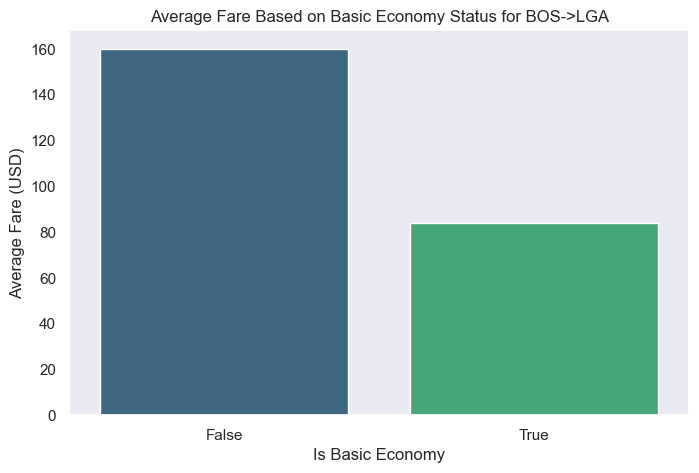

In [27]:
# Define your specific origin and destination
origin = 'BOS'
destination = 'LGA'

# Filter the DataFrame for the specific origin-destination pair
filtered_df = merged_df[(merged_df['startingAirport'] == origin) & (merged_df['destinationAirport'] == destination)]

# Calculate the average totalFare based on isBasicEconomy
average_fares = filtered_df.groupby('isBasicEconomy')['totalFare'].mean().reset_index()

average_fares.columns = ['isBasicEconomy', 'averageFare']

# Create a bar plot
plt.figure(figsize=(8, 5))
sns.barplot(data=average_fares, x='isBasicEconomy', y='averageFare', palette='viridis')

# Add labels and title
plt.title('Average Fare Based on Basic Economy Status for BOS->LGA')
plt.xlabel('Is Basic Economy')
plt.ylabel('Average Fare (USD)')
plt.xticks(ticks=[0, 1], labels=['False', 'True'])
plt.grid(axis='y')

# Show the plot
plt.show()

## [3.7] Refundable

All the values in the refundable feature belong to a single class. There are no flights that provide refunds.

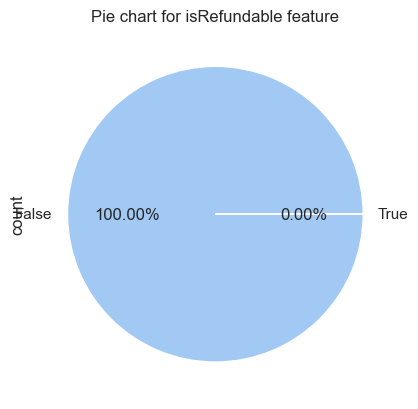

In [28]:
create_pie_chart(merged_df, 'isRefundable')

## [3.8] Non Stop

The majority of flights have stops in between. People usually choose this option due to 2 major factors. First, they travel more and visit external places apart from their planned locations. The other reasons which might vary a little is that connecting flights are cheaper than non-stop.

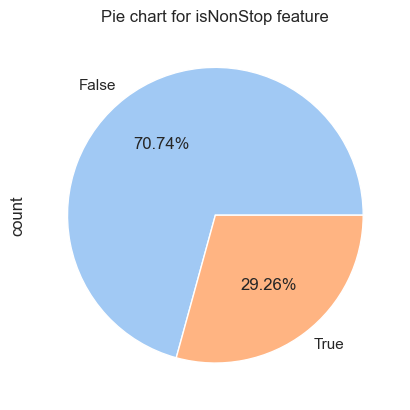

In [29]:
create_pie_chart(merged_df, 'isNonStop')

The prices for connecting flights are higher as seen in the graph below. This could be due to extra distances covered while travelling. 

/var/folders/y7/4mw_ll2n3zz0kzg7v6kt7kwm0000gn/T/ipykernel_5778/360426423.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_fares, x='isNonStop', y='averageFare', palette='viridis')


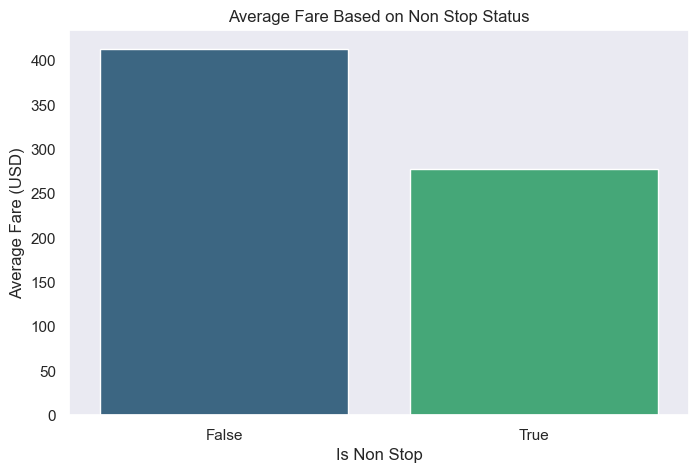

In [30]:
average_fares = merged_df.groupby('isNonStop')['totalFare'].mean().reset_index()

average_fares.columns = ['isNonStop', 'averageFare']

# Create a bar plot
plt.figure(figsize=(8, 5))
sns.barplot(data=average_fares, x='isNonStop', y='averageFare', palette='viridis')

# Add labels and title
plt.title('Average Fare Based on Non Stop Status')
plt.xlabel('Is Non Stop')
plt.ylabel('Average Fare (USD)')
plt.xticks(ticks=[0, 1], labels=['False', 'True'])
plt.grid(axis='y')

# Show the plot
plt.show()

/var/folders/y7/4mw_ll2n3zz0kzg7v6kt7kwm0000gn/T/ipykernel_5778/3378770220.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_fares, x='isNonStop', y='averageFare', palette='viridis')


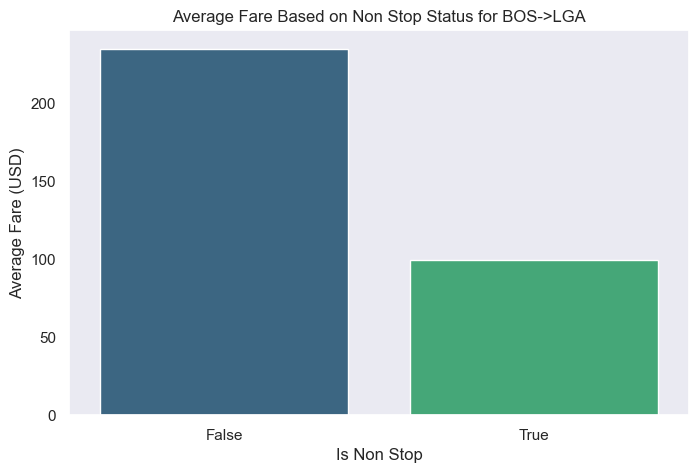

In [31]:
# Define your specific origin and destination
origin = 'BOS'
destination = 'LGA'

# Filter the DataFrame for the specific origin-destination pair
filtered_df = merged_df[(merged_df['startingAirport'] == origin) & (merged_df['destinationAirport'] == destination)]

# Calculate the average totalFare based on isBasicEconomy
average_fares = filtered_df.groupby('isNonStop')['totalFare'].mean().reset_index()

average_fares.columns = ['isNonStop', 'averageFare']

# Create a bar plot
plt.figure(figsize=(8, 5))
sns.barplot(data=average_fares, x='isNonStop', y='averageFare', palette='viridis')

# Add labels and title
plt.title('Average Fare Based on Non Stop Status for BOS->LGA')
plt.xlabel('Is Non Stop')
plt.ylabel('Average Fare (USD)')
plt.xticks(ticks=[0, 1], labels=['False', 'True'])
plt.grid(axis='y')

# Show the plot
plt.show()

## [3.9] Coach

In [32]:
merged_df['segmentsCabinCode'].value_counts()

segmentsCabinCode
coach||coach                                   8528140
coach                                          3940119
coach||coach||coach                             950943
coach||coach||coach||coach                       37426
premium coach                                     9976
premium coach||coach                              9486
first||coach                                      9030
coach||premium coach                              8097
first||first                                      6286
coach||first                                      4718
first                                             3748
business                                          2092
premium coach||premium coach                      2014
first||first||first                               1247
premium coach||coach||coach                       1244
coach||coach||premium coach                        915
business||business                                 669
first||coach||coach                            

## [3.10] Multi-Collinearity

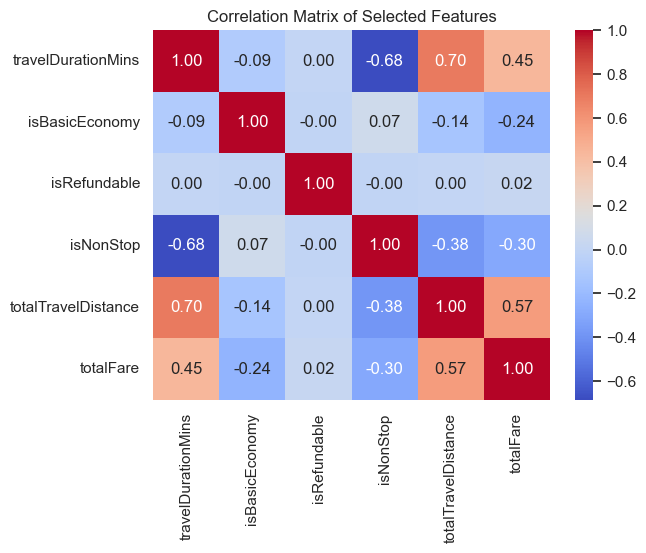

In [33]:
feature_list = ['travelDurationMins', 'isBasicEconomy', 'isRefundable', 'isNonStop', 'totalTravelDistance', 'totalFare']
create_corr_matrix(merged_df, feature_list)

# 4. Data cleaning

## [4.1] Segmentation

Columns such as cabin type, departure time epoch seconds, departure time raw, etc contain multiple segment data. This is due to the concept of connecting flights where each value corresponds to its specific segment. They contain “||” symbol between them which helps identify the segments. These were split into columns for each segment.

In [34]:
df_cleaned = merged_df.copy()

In [35]:
segment_counts = df_cleaned['segmentsCabinCode'].str.split(r'\|\|', expand=False).apply(lambda x: len(x) if isinstance(x, list) else 0)

# Step 2: Find the maximum count
max_segments = segment_counts.max()

print(f"Maximum number of segments: {max_segments}")

Maximum number of segments: 4


In [36]:
def split_column_to_segments(df, column_name, column_prefix):
    # Split the column based on the delimiter and expand into new columns
    split_columns = df[column_name].str.split(r'\|\|', expand=True)
    
    # Rename the new columns
    split_columns.columns = [f'{column_prefix}Segment{i+1}' for i in range(split_columns.shape[1])]
    
    # Concatenate the new columns with the original DataFrame, dropping the original column
    df = pd.concat([df.drop(columns=[column_name]), split_columns], axis=1)
    
    return df

In [37]:
df_cleaned = split_column_to_segments(df_cleaned, column_name='segmentsCabinCode', column_prefix='cabinTypeSegment')

In [38]:
df_cleaned.head(10)

,legId,searchDate,flightDate,startingAirport,destinationAirport,travelDuration,isBasicEconomy,isRefundable,isNonStop,totalFare,...,segmentsAirlineName,segmentsAirlineCode,segmentsEquipmentDescription,segmentsDurationInSeconds,segmentsDistance,travelDurationMins,cabinTypeSegmentSegment1,cabinTypeSegmentSegment2,cabinTypeSegmentSegment3,cabinTypeSegmentSegment4
0,e1b137527b9175d7d930c3af82e70ae0,2022-04-19,2022-05-20,OAK,ATL,PT7H52M,False,False,False,103.98,...,Frontier Airlines||Frontier Airlines,F9||F9,||Airbus A320,9180||10620,943||1207,472.0,coach,coach,None,None
1,d813ebd107e3fa700206c0d96015da7a,2022-04-19,2022-05-20,OAK,ATL,PT6H15M,False,False,False,216.58,...,Spirit Airlines||Spirit Airlines,NK||NK,||AIRBUS INDUSTRIE A320 SHARKLETS,4920||15600,None||None,375.0,coach,coach,None,None
2,e8ece5ad6f5962c696e06e031fc2a24a,2022-04-19,2022-05-20,OAK,ATL,PT9H6M,False,False,False,216.58,...,Spirit Airlines||Spirit Airlines,NK||NK,AIRBUS INDUSTRIE A320 SHARKLETS||AIRBUS INDUST...,4920||15600,None||None,546.0,coach,coach,None,None
3,c004a54681335100f326c9613b3c9448,2022-04-19,2022-05-20,OAK,ATL,PT6H17M,False,False,False,237.58,...,Spirit Airlines||Spirit Airlines,NK||NK,AIRBUS INDUSTRIE A320 SHARKLETS||Airbus A319,5580||13980,None||None,377.0,coach,coach,None,None
4,4a42bbf77211b4afa7b9e14005949120,2022-04-19,2022-05-20,OAK,ATL,PT14H12M,False,False,False,307.21,...,Alaska Airlines||Alaska Airlines,AS||AS,Boeing 737-900||Boeing 737-900,7500||17580,672||2178,852.0,coach,coach,None,None
5,9157572cdd530976f707a162a4fcfde8,2022-04-19,2022-05-20,OAK,ATL,PT9H8M,True,False,False,318.60,...,Alaska Airlines||Alaska Airlines,AS||AS,Boeing 737-800||Boeing 737-900,7620||17820,672||2178,548.0,coach,coach,None,None
6,1818c5a6f7059cfde40105cdacda9c29,2022-04-19,2022-05-20,OAK,ATL,PT14H13M,False,False,False,366.58,...,Spirit Airlines||Spirit Airlines,NK||NK,AIRBUS INDUSTRIE A320 SHARKLETS||Airbus A319,5460||13980,None||None,853.0,coach,coach,None,None
7,e8baed3d41a0c35856f7591a5baad060,2022-04-19,2022-05-20,OAK,ATL,PT13H14M,False,False,False,410.69,...,Delta||Delta||Delta,DL||DL||DL,Embraer 175 (Enhanced Winglets)||Boeing 737-80...,4860||13320||4380,338||1615||332,794.0,coach,coach,coach,None
8,965e29ef7e8d11bf05f723a28ab8e4e0,2022-04-19,2022-05-20,OAK,ATL,PT12H40M,False,False,False,437.71,...,Delta||Delta||Delta,DL||DL||DL,Embraer 175 (Enhanced Winglets)||Airbus A220-1...,7020||9960||7980,588||1078||811,760.0,coach,coach,coach,None
9,50aae8333ddca38814b9756bba08daad,2022-04-19,2022-05-20,OAK,ATL,PT12H47M,False,False,False,449.70,...,Delta||Delta||Delta,DL||DL||DL,Embraer 175 (Enhanced Winglets)||Airbus A321||...,7020||9540||7500,588||992||725,767.0,coach,coach,coach,None


## [4.2] Missing Values

Checking for missing values

In [39]:
missing_values_summary(df_cleaned)

,Missing Values,% Missing Values
cabinTypeSegmentSegment4,13482281,99.7
cabinTypeSegmentSegment3,12525106,92.6
cabinTypeSegmentSegment2,3955935,29.3
totalTravelDistance,959619,7.1
segmentsEquipmentDescription,262676,1.9
segmentsDistance,126985,0.9


The missing values were summarised, in which the segmented parts had the majority. This is because there are very limited flights with 2 or 3 stops. In this case, the variable “No cabin” was used to replace missing values. In the case of totalTravelDistance, the missing values were replaced with the median distance value for the specific origin-destination pair.

In [40]:
medians = df_cleaned.groupby(['startingAirport', 'destinationAirport'])['totalTravelDistance'].transform('median')

In [41]:
df_cleaned['totalTravelDistance'].fillna(medians, inplace=True)

/var/folders/y7/4mw_ll2n3zz0kzg7v6kt7kwm0000gn/T/ipykernel_5778/1789479320.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['totalTravelDistance'].fillna(medians, inplace=True)


In [42]:
columns = ['cabinTypeSegmentSegment4', 'cabinTypeSegmentSegment3', 'cabinTypeSegmentSegment2']
for column in columns:
    df_cleaned[column].fillna('No cabin', inplace=True)

/var/folders/y7/4mw_ll2n3zz0kzg7v6kt7kwm0000gn/T/ipykernel_5778/3976703150.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned[column].fillna('No cabin', inplace=True)


In [43]:
missing_values_summary(df_cleaned)

,Missing Values,% Missing Values
segmentsEquipmentDescription,262676,1.9
segmentsDistance,126985,0.9


In [44]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13519999 entries, 0 to 13519998
Data columns (total 27 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   legId                              object 
 1   searchDate                         object 
 2   flightDate                         object 
 3   startingAirport                    object 
 4   destinationAirport                 object 
 5   travelDuration                     object 
 6   isBasicEconomy                     bool   
 7   isRefundable                       bool   
 8   isNonStop                          bool   
 9   totalFare                          float64
 10  totalTravelDistance                float64
 11  segmentsDepartureTimeEpochSeconds  object 
 12  segmentsDepartureTimeRaw           object 
 13  segmentsArrivalTimeEpochSeconds    object 
 14  segmentsArrivalTimeRaw             object 
 15  segmentsArrivalAirportCode         object 
 16  segmentsDepartur

## [4.3] Adding Number of Stops Column

In [47]:
df_cleaned['numStops'] = df_cleaned['segmentsArrivalAirportCode'].apply(lambda x: len(x.split('||')) - 1)

## [4.4] Splitting Date Columns in day, month and year

The first segment of the departure_date was then extracted and converted to a datetime format with timezone awareness, assuming it was originally in the UTC time zone. This date was subsequently converted to the Australian time zone, as the app users are located in Australia. Finally, the date was split into individual components: day, month, year, hour, and minute.

### [4.4.1] Converting the first leg departure time to Australian Standard time and extracting values

In [48]:
# Define Australian timezone
australia_timezone = pytz.timezone("Australia/Sydney")

# Extract the first segment's datetime string
df_cleaned['firstSegmentDepartureTime'] = df_cleaned['segmentsDepartureTimeRaw'].str.split(r'\|\|').str[0]

# Convert the new column to datetime format with time zone awareness
df_cleaned['firstSegmentDepartureTime'] = pd.to_datetime(df_cleaned['firstSegmentDepartureTime'], errors='coerce', utc=True)

In [49]:
df_cleaned[['segmentsDepartureTimeRaw', 'firstSegmentDepartureTime']]

,segmentsDepartureTimeRaw,firstSegmentDepartureTime
0,2022-05-20T18:58:00.000-07:00||2022-05-21T00:5...,2022-05-21 01:58:00+00:00
1,2022-05-20T08:56:00.000-07:00||2022-05-20T10:5...,2022-05-20 15:56:00+00:00
2,2022-05-20T06:05:00.000-07:00||2022-05-20T10:5...,2022-05-20 13:05:00+00:00
3,2022-05-20T20:56:00.000-07:00||2022-05-20T23:2...,2022-05-21 03:56:00+00:00
4,2022-05-20T21:41:00.000-07:00||2022-05-21T07:0...,2022-05-21 04:41:00+00:00
...,...,...
13519994,2022-06-15T08:05:00.000-04:00||2022-06-15T17:0...,2022-06-15 12:05:00+00:00
13519995,2022-06-15T15:26:00.000-04:00||2022-06-15T20:1...,2022-06-15 19:26:00+00:00
13519996,2022-06-15T11:15:00.000-04:00||2022-06-15T16:5...,2022-06-15 15:15:00+00:00
13519997,2022-06-15T07:20:00.000-04:00||2022-06-15T13:0...,2022-06-15 11:20:00+00:00


In [50]:
# Convert the datetime to Australian Eastern Time
df_cleaned['firstSegmentDepartureTime_AUS'] = df_cleaned['firstSegmentDepartureTime'].dt.tz_convert(australia_timezone)

# Extract year, month, day, hour, and minute
df_cleaned['flightYear'] = df_cleaned['firstSegmentDepartureTime_AUS'].dt.year
df_cleaned['flightMonth'] = df_cleaned['firstSegmentDepartureTime_AUS'].dt.month
df_cleaned['flightDay'] = df_cleaned['firstSegmentDepartureTime_AUS'].dt.day
df_cleaned['flightHour'] = df_cleaned['firstSegmentDepartureTime_AUS'].dt.hour
df_cleaned['flightMinute'] = df_cleaned['firstSegmentDepartureTime_AUS'].dt.minute

In [51]:
print(df_cleaned[['segmentsDepartureTimeRaw', 'firstSegmentDepartureTime_AUS', 'flightYear', 'flightMonth', 'flightDay', 'flightHour', 'flightMinute']])

                                   segmentsDepartureTimeRaw  \
0         2022-05-20T18:58:00.000-07:00||2022-05-21T00:5...   
1         2022-05-20T08:56:00.000-07:00||2022-05-20T10:5...   
2         2022-05-20T06:05:00.000-07:00||2022-05-20T10:5...   
3         2022-05-20T20:56:00.000-07:00||2022-05-20T23:2...   
4         2022-05-20T21:41:00.000-07:00||2022-05-21T07:0...   
...                                                     ...   
13519994  2022-06-15T08:05:00.000-04:00||2022-06-15T17:0...   
13519995  2022-06-15T15:26:00.000-04:00||2022-06-15T20:1...   
13519996  2022-06-15T11:15:00.000-04:00||2022-06-15T16:5...   
13519997  2022-06-15T07:20:00.000-04:00||2022-06-15T13:0...   
13519998  2022-06-15T07:20:00.000-04:00||2022-06-15T16:5...   

         firstSegmentDepartureTime_AUS  flightYear  flightMonth  flightDay  \
0            2022-05-21 11:58:00+10:00        2022            5         21   
1            2022-05-21 01:56:00+10:00        2022            5         21   
2        

### [4.4.1] Adding column based on number of days between flight date and search date

In [56]:
# Step 1: Casting the columns to datetime format
df_cleaned['searchDate'] = pd.to_datetime(df_cleaned['searchDate'])

# Make column timezone-naive by removing timezone information
df_cleaned['firstSegmentDepartureTime_AUS'] = df_cleaned['firstSegmentDepartureTime_AUS'].dt.tz_localize(None)

In [57]:
df_cleaned['days_difference'] = (df_cleaned['firstSegmentDepartureTime_AUS'] - df_cleaned['searchDate']).dt.days

## [4.5] Dropping Columns

In [58]:
cols_to_drop = ['legId', 'searchDate', 'flightDate', 'travelDuration', 'isBasicEconomy', 'isRefundable', 'isNonStop', 
                'segmentsDepartureTimeEpochSeconds', 'segmentsDepartureTimeRaw', 'segmentsArrivalTimeEpochSeconds', 
                'segmentsArrivalTimeRaw', 'segmentsArrivalAirportCode', 'segmentsDepartureAirportCode', 'segmentsAirlineName', 
                'segmentsAirlineCode', 'segmentsEquipmentDescription', 'segmentsDurationInSeconds', 'segmentsDistance', 
                'firstSegmentDepartureTime', 'firstSegmentDepartureTime_AUS', 'flightYear']
df_dropped = df_cleaned.drop(columns=cols_to_drop)

In [59]:
df_dropped.columns

Index(['startingAirport', 'destinationAirport', 'totalFare',
       'totalTravelDistance', 'travelDurationMins', 'cabinTypeSegmentSegment1',
       'cabinTypeSegmentSegment2', 'cabinTypeSegmentSegment3',
       'cabinTypeSegmentSegment4', 'numStops', 'flightMonth', 'flightDay',
       'flightHour', 'flightMinute', 'days_difference'],
      dtype='object')

## [4.6] Saving dataframe

In [60]:
df_dropped.to_csv('../data/interim/cleaned_data_1.csv', index=False)

# 5. Creating External data file with travel distance and duration based on stops

In [241]:
# Calculate average travel distance and duration for numStops == 0
avg_no_stops = df_cleaned[df_cleaned['numStops'] == 0].groupby(['startingAirport', 'destinationAirport']).agg(
    avg_travel_distance_no_stops=('totalTravelDistance', 'mean'),
    avg_travel_duration_no_stops=('travelDurationMins', 'mean')
).reset_index()

# Calculate average travel distance and duration for numStops > 0
avg_with_stops = df_cleaned[df_cleaned['numStops'] > 0].groupby(['startingAirport', 'destinationAirport']).agg(
    avg_travel_distance_with_stops=('totalTravelDistance', 'mean'),
    avg_travel_duration_with_stops=('travelDurationMins', 'mean')
).reset_index()

# Merge the results into a single DataFrame
result = pd.merge(avg_no_stops, avg_with_stops, on=['startingAirport', 'destinationAirport'], how='outer')

# Replace NaN values in the no-stops columns with values from the with-stops columns
result['avg_travel_distance_no_stops'] = result['avg_travel_distance_no_stops'].fillna(result['avg_travel_distance_with_stops'])
result['avg_travel_duration_no_stops'] = result['avg_travel_duration_no_stops'].fillna(result['avg_travel_duration_with_stops'])

result[['avg_travel_distance_no_stops', 'avg_travel_duration_no_stops', 
        'avg_travel_distance_with_stops', 'avg_travel_duration_with_stops']] = result[['avg_travel_distance_no_stops', 
                                                                                           'avg_travel_duration_no_stops', 
                                                                                           'avg_travel_distance_with_stops', 
                                                                                           'avg_travel_duration_with_stops']].round(2)

In [242]:
result

,startingAirport,destinationAirport,avg_travel_distance_no_stops,avg_travel_duration_no_stops,avg_travel_distance_with_stops,avg_travel_duration_with_stops
0,ATL,BOS,947.00,157.34,1010.86,420.67
1,ATL,CLT,228.00,77.45,1137.70,448.08
2,ATL,DEN,1207.38,197.17,1699.79,520.29
3,ATL,DFW,725.00,139.26,1096.91,428.13
4,ATL,DTW,674.21,115.49,1083.79,425.36
...,...,...,...,...,...,...
230,SFO,LGA,2797.94,615.13,2797.94,615.13
231,SFO,MIA,2582.54,338.54,3083.41,655.42
232,SFO,OAK,851.93,429.00,851.93,429.00
233,SFO,ORD,1847.36,259.46,2195.89,536.34


In [243]:
missing_values_summary(result)

,Missing Values,% Missing Values


In [244]:
result.to_csv('../data/processed/external.csv', index=False)